In [895]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [896]:
example_dataset = pd.read_csv('c:/users/cauchepy/Datasets/Datatables/kaggle_usedcarprices/used_cars.csv')
df_train = pd.read_csv('c:/users/cauchepy/Datasets/Datatables/kaggle_usedcarprices/train.csv')
df_test = pd.read_csv('c:/users/cauchepy/Datasets/Datatables/kaggle_usedcarprices/test.csv')
df_submission = pd.read_csv('c:/users/cauchepy/Datasets/Datatables/kaggle_usedcarprices/sample_submission.csv')

In [897]:
df_train.columns

Index(['id', 'brand', 'model', 'model_year', 'milage', 'fuel_type', 'engine',
       'transmission', 'ext_col', 'int_col', 'accident', 'clean_title',
       'price'],
      dtype='object')

# Data Science

In [898]:
df_train['brand'].value_counts()
df_train['brand'] = df_train['brand'].str.lower().str.replace('[^a-z0-9]', '', regex=True)
brand_counts = df_train['brand'].value_counts()

C:\Users\cauchepy\AppData\Local\Temp\ipykernel_14744\2779346997.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=brand_counts.index, y=brand_counts.values, palette='viridis')


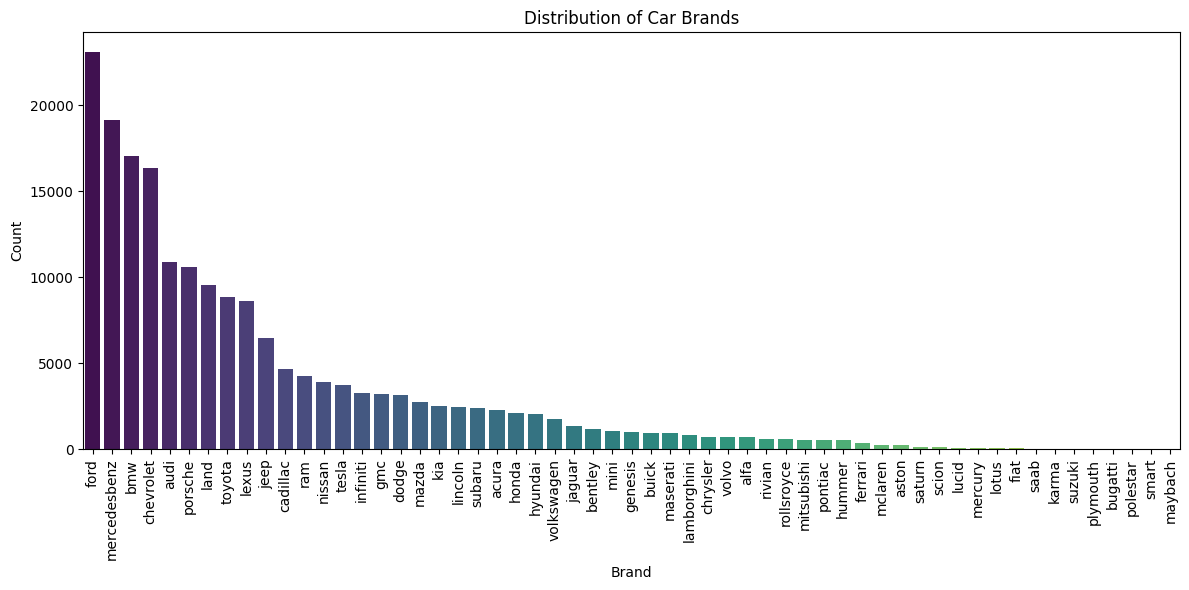

In [899]:
plt.figure(figsize=(12, 6)) 
sns.barplot(x=brand_counts.index, y=brand_counts.values, palette='viridis')
plt.xlabel('Brand')
plt.ylabel('Count')
plt.title('Distribution of Car Brands')
plt.xticks(rotation=90)
plt.tight_layout() 
plt.show()

### Model column

In [900]:
df_train['model'].value_counts()
df_train['model'] = df_train['model'].str.lower().str.replace('[^a-z0-9]', '', regex=True)
df_train['model'].value_counts().to_frame()

,count
model,
f150xlt,2945
m3base,2229
camaro2ss,1709
m4base,1622
mustanggtpremium,1526
...,...
ioniqpluginhybridsel,2
x530i,1
x5xdrive40e,1


In [901]:
df_train['model_year'] = df_train['model_year'].astype(int)
model_year_counts = df_train['model_year'].value_counts()

C:\Users\cauchepy\AppData\Local\Temp\ipykernel_14744\3014541332.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_year_counts.index, y=model_year_counts.values, palette='viridis')


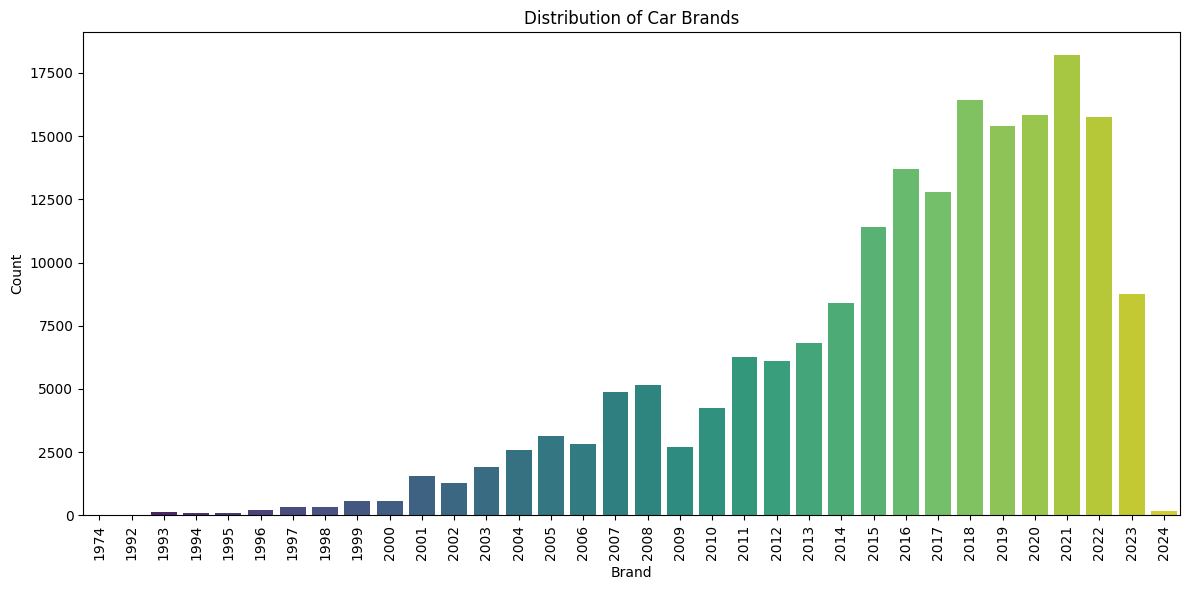

In [902]:
plt.figure(figsize=(12, 6)) 
sns.barplot(x=model_year_counts.index, y=model_year_counts.values, palette='viridis')
plt.xlabel('Brand')
plt.ylabel('Count')
plt.title('Distribution of Car Brands')
plt.xticks(rotation=90)
plt.tight_layout() 
plt.show()

In [903]:
df_train['milage'] = df_train['milage'].astype(float)

In [904]:
display(df_train['milage'].describe().to_frame())

,milage
count,188533.000000
mean,65705.295174
std,49798.158076
min,100.000000
25%,24115.000000
50%,57785.000000
75%,95400.000000
max,405000.000000


In [905]:
df_train['engine'].value_counts().index.to_list()

['355.0HP 5.3L 8 Cylinder Engine Gasoline Fuel',
 '240.0HP 2.0L 4 Cylinder Engine Gasoline Fuel',
 '420.0HP 6.2L 8 Cylinder Engine Gasoline Fuel',
 '2.0L I4 16V GDI DOHC Turbo',
 '375.0HP 3.5L V6 Cylinder Engine Gasoline Fuel',
 '340.0HP 3.0L V6 Cylinder Engine Gasoline Fuel',
 '490.0HP 6.2L 8 Cylinder Engine Gasoline Fuel',
 '455.0HP 6.2L 8 Cylinder Engine Gasoline Fuel',
 '425.0HP 3.0L Straight 6 Cylinder Engine Gasoline Fuel',
 '300.0HP 3.0L Straight 6 Cylinder Engine Gasoline Fuel',
 '295.0HP 3.5L V6 Cylinder Engine Gasoline Fuel',
 '285.0HP 3.6L V6 Cylinder Engine Gasoline Fuel',
 '302.0HP 3.5L V6 Cylinder Engine Gasoline Fuel',
 '3.5L V6 24V PDI DOHC Twin Turbo',
 '301.0HP 4.6L 8 Cylinder Engine Gasoline Fuel',
 '5.7L V8 16V MPFI OHV',
 '4.0L V8 32V GDI DOHC Twin Turbo',
 '3.6L V6 24V MPFI DOHC',
 '268.0HP 3.5L V6 Cylinder Engine Gasoline Fuel',
 '333.0HP 3.0L V6 Cylinder Engine Gasoline Fuel',
 '365.0HP 3.5L V6 Cylinder Engine Gasoline Fuel',
 '211.0HP 2.0L 4 Cylinder Engine Gas

In [906]:
horsepower_pattern = r'(\d+\.?\d*)\s*HP'
df_train['horsepower'] = df_train['engine'].str.extract(horsepower_pattern, expand=False)
df_train['horsepower'] = pd.to_numeric(df_train['horsepower'], errors='coerce')
df_train['engine'] = df_train['engine'].str.replace(horsepower_pattern, '', regex=True)
df_train['horsepower'].describe().to_frame()

,horsepower
count,155274.000000
mean,343.263856
std,114.734210
min,70.000000
25%,263.000000
50%,329.000000
75%,416.000000
max,1020.000000


In [907]:
liters_pattern = r'(\d+\.?\d*)\s*(?:L|Liter)'
df_train['liters'] = df_train['engine'].str.extract(liters_pattern, expand=False)
df_train['liters'] = pd.to_numeric(df_train['liters'], errors='coerce')
df_train['engine'] = df_train['engine'].str.replace(liters_pattern, '', regex=True)
df_train['liters'].describe().to_frame()


,liters
count,181835.000000
mean,3.775396
std,1.352465
min,0.650000
25%,3.000000
50%,3.500000
75%,4.700000
max,8.400000


In [908]:
v_pattern_extract = r'(?:(\d+)\s*V|V\s*(\d+))'
extracted_v_df = df_train['engine'].str.extract(v_pattern_extract)
combined_v_series = extracted_v_df.iloc[:, 0].fillna(extracted_v_df.iloc[:, 1])
df_train['volume'] = combined_v_series
df_train['volume'] = pd.to_numeric(df_train['volume'], errors='coerce')
v_pattern_remove = r'\d+\s*V|V\s*\d+'
df_train['engine'] = df_train['engine'].str.replace(v_pattern_remove, '', regex=True)
df_train['volume'].describe().to_frame()
df_train['volume'].value_counts().to_frame()



,count
volume,
6.0,57655
8.0,6944
16.0,6081
24.0,1000
12.0,661
10.0,389
48.0,137
64.0,20
697.0,8


In [909]:
cylinder_pattern_extract = r'(\d+)\s*Cylinder'
df_train['cylinders'] = df_train['engine'].str.extract(cylinder_pattern_extract, expand=False)
df_train['cylinders'] = pd.to_numeric(df_train['cylinders'], errors='coerce')

cylinder_pattern_remove = r'\d+\s*Cylinder'
df_train['engine'] = df_train['engine'].str.replace(cylinder_pattern_remove, '', regex=True)

df_train['cylinder_count'] = df_train['cylinders'].fillna(df_train['volume'])
df_train['cylinder_count'] = df_train['cylinder_count'].astype('Int64')

df_train = df_train.drop(columns=['volume', 'cylinders'])

df_train['cylinder_count'].describe().to_frame() 


,cylinder_count
count,174256.0
mean,6.958681
std,5.537733
min,3.0
25%,6.0
50%,6.0
75%,8.0
max,697.0


In [910]:
from collections import Counter

df_train['engine'] = df_train['engine'].fillna('').astype(str)
df_train['engine'] = df_train['engine'].str.replace(r'[^a-zA-Z0-9\s]', '', regex=True)
df_train['engine'] = df_train['engine'].str.lower()
all_tokens = [token for text in df_train['engine'] for token in text.split()]
token_counts = Counter(all_tokens)
token_counts_series = pd.Series(token_counts).sort_values(ascending=False)
token_counts_series.head(30)

engine          150696
fuel            150291
gasoline        136161
cylinder         49317
dohc             19534
turbo            14270
gdi              14010
electric         13993
straight         11640
iter              7444
twin              6864
i4                6044
hybrid            5531
flat              5344
flex              5168
capability        5168
motor             5082
system            4949
mpfi              4582
pdi               4331
diesel            4119
ohv               3943
gasolinemild      3573
gaselectric       1558
tfsi               831
h6                 667
sohc               607
plugin             537
electricgas        537
ddi                396
dtype: int64

In [911]:
df_train['turbo'] = df_train['engine'].str.contains('turbo', regex=True).astype(int)
df_train['turbo'].value_counts()

turbo
0    174263
1     14270
Name: count, dtype: int64

In [912]:
df_train['electric'] = df_train['engine'].str.contains('electric', regex=True).astype(int)
df_train['electric'].value_counts()

electric
0    177394
1     11139
Name: count, dtype: int64

In [913]:
def simplify_engine(engine_str):
    if 'hybrid' in engine_str:
        return 'hybrid'
    elif 'diesel' in engine_str:
        return 'diesel'
    elif 'fuel' in engine_str:
        return 'fuel'
    elif 'gasoline' in engine_str or 'gas' in engine_str:
        return 'gasoline'
    else:
        return np.nan
    
df_train['engine_type'] = df_train['engine'].apply(simplify_engine)
df_train['engine_type'].value_counts()

engine_type
fuel        146600
hybrid        5531
diesel        4119
gasoline       537
Name: count, dtype: int64

In [914]:
df_train = df_train.drop(columns=['engine'])

In [915]:
df_train['fuel_type'] = df_train['fuel_type'].str.lower().str.replace(r'[^a-z0-9]', '', regex=True)
df_train['fuel_type'].value_counts().to_frame()

,count
fuel_type,
gasoline,165940
hybrid,6832
e85flexfuel,5406
diesel,3955
,781
pluginhybrid,521
notsupported,15


In [916]:
df_train['fuel_type'] = df_train['fuel_type'].str.replace('e85flexfuel', 'fuel', regex=True)
df_train['fuel_type'] = df_train['fuel_type'].str.replace('pluginhybrid', 'hybrid', regex=True)
df_train['fuel_type'] = df_train['fuel_type'].str.replace('notsupported', '', regex=True)

In [917]:
condition = df_train['fuel_type'] == ''
df_train.loc[condition, 'fuel_type'] = df_train.loc[condition, 'engine_type']
df_train['fuel_type'].value_counts().to_frame()

,count
fuel_type,
gasoline,165940
hybrid,7354
fuel,5427
diesel,3955


In [918]:
df_train = df_train.drop(columns=['engine_type'])

In [919]:
df_train = df_train.drop(columns=['clean_title'])

In [920]:
df_train['transmission'] = df_train['transmission'].str.replace('Single-Speed', '1-Speed', case=False, regex=False)
df_train['transmission'] = df_train['transmission'].str.replace('2', '2-Speed', case=False, regex=False)


speed_pattern = r'(?i)(\d+)\s*-?\s*Speed'
df_train['speed'] = df_train['transmission'].str.extract(speed_pattern, expand=False)
df_train['speed'] = pd.to_numeric(df_train['speed'], errors='coerce').astype('Int64')
df_train['transmission'] = df_train['transmission'].str.replace(speed_pattern, '', regex=True)
df_train['speed'].value_counts().to_frame()


,count
speed,
6,33278
8,29673
7,13027
10,11248
9,6224
5,5785
4,2594
1,2250
2,184


In [921]:
df_train['transmission'].value_counts().to_frame()

,count
transmission,
A/T,69362
A/T,49904
Transmission w/Dual Shift Mode,19255
Automatic,17469
M/T,14762
Automatic,10691
CVT Transmission,1990
Automatic with Auto-Shift,1865
M/T,1179


In [922]:
df_train['transmission'] = df_train['transmission'].fillna('').astype(str)
df_train['transmission'] = df_train['transmission'].str.replace(r'[^a-zA-Z0-9\s]', '', regex=True)
df_train['transmission'] = df_train['transmission'].str.lower()
df_train['transmission'] = df_train['transmission'].str.replace(r'\bat\b', 'automatic', regex=True)
df_train['transmission'] = df_train['transmission'].str.replace(r'\bmt\b', 'manual', regex=True)
df_train['transmission'] = df_train['transmission'].str.replace(r'\batmt\b', 'automatic', regex=True)
df_train['transmission'] = df_train['transmission'].str.replace(r'\bcvt\b', 'Automatic', regex=True)

df_train['transmission'].value_counts().to_frame()

,count
transmission,
automatic,86864
automatic,60595
transmission wdual shift mode,19255
manual,15189
Automatic transmission,1990
automatic with autoshift,1865
manual,1206
automatic Automatic,829
,234


In [923]:
all_tokens = [token.lower() for text in df_train['transmission'] for token in text.split()]
token_counts = Counter(all_tokens)
token_counts_series = pd.Series(token_counts).sort_values(ascending=False)
token_counts_series.head(30)

automatic         153154
transmission       21401
wdual              19255
shift              19255
mode               19255
manual             16395
with                1936
autoshift           1865
overdrive            196
switch               156
speed                 93
variable              66
f                     65
controlled            31
o                     31
electronically        31
dct                   18
fixed                 16
gear                  16
cvtf                  15
scheduled              6
for                    6
or                     6
in                     6
production             6
dtype: int64

In [924]:
def simplify_transmission(transmission_str):
    if 'automatic' in transmission_str:
        return 'automatic'
    elif 'manual' in transmission_str:
        return 'manual'
    else:
        return np.nan
    
df_train['transmission'] = df_train['transmission'].apply(simplify_transmission)
df_train['transmission'].value_counts()

transmission
automatic    150335
manual        16395
Name: count, dtype: int64

In [928]:
df_train['ext_col'].value_counts().index.to_list()

['Black',
 'White',
 'Gray',
 'Silver',
 'Blue',
 'Red',
 'Green',
 'Gold',
 'Brown',
 'Orange',
 'Beige',
 'Yellow',
 'Bright White Clearcoat',
 'Diamond Black',
 'Agate Black Metallic',
 'Summit White',
 'Silver Ice Metallic',
 'Mythos Black Metallic',
 'Midnight Black Metallic',
 '–',
 'Granite Crystal Clearcoat Metallic',
 'Purple',
 'Santorini Black Metallic',
 'Oxford White',
 'Obsidian Black Metallic',
 'Black Clearcoat',
 'Ebony Twilight Metallic',
 'Alpine White',
 'designo Diamond White Metallic',
 'Daytona Gray Pearl Effect',
 'Snowflake White Pearl',
 'Soul Red Crystal Metallic',
 'Shadow Gray Metallic',
 'Delmonico Red Pearlcoat',
 'Firecracker Red Clearcoat',
 'Glacial White Pearl',
 'Atomic Silver',
 'Fuji White',
 'Velvet Red Pearlcoat',
 'Black Sapphire Metallic',
 'Satin Steel Metallic',
 'Magnetic Metallic',
 'Rosso Mars Metallic',
 'Cajun Red Tintcoat',
 'Santorin Black',
 'Metallic',
 'Lunar Silver Metallic',
 'Brilliant Silver Metallic',
 'Antimatter Blue Metallic

['None reported', 'At least 1 accident or damage reported']

In [ ]:
def clean_df(df):
    df_train['brand'] = df_train['brand'].str.lower().str.replace('[^a-z0-9]', '', regex=True)
    df_train['model'] = df_train['model'].str.lower().str.replace('[^a-z0-9]', '', regex=True)
    df_train['model_year'] = df_train['model_year'].astype(int)
    df_train['milage'] = df_train['milage'].astype(float)
    